In [84]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
#I am going to use keras for creating convolution neural network
import keras
#I am using sequential model . model from keras.models can also be used and create layers as functions 
from keras.layers import Convolution2D, Flatten, Dense, MaxPool2D, Activation, Dropout
from keras.models import Sequential
from keras.utils import np_utils
import datetime

In [85]:
# Data loading you need to download mnist from kaggle and keep it in the same directory as this notebook to run this cell

ds = pd.read_csv('train.csv')
ds.shape
data = ds.values
print data.shape

(42000, 785)


In [86]:
data[445][0]

4

In [87]:
#Dividing data in da digits less than 5 others in da2
da = []
da2 = []
for i in range(data.shape[0]):
    if data[i][0] < 5 :
        da.append(data[i])
    else :
        da2.append(data[i])
da = np.array(da)        
da2 = np.array(da2)

In [88]:
da.shape

(21416, 785)

In [89]:
#converting range of each pixel from 0 to 1.
X = da[:, 1:]/255.0
#Converting each y from just the class value(42000,1) to a vector representing 1 for the class (42000,10)
y = np_utils.to_categorical(da[:, 0])

print X.shape, y.shape

(21416, 784) (21416, 5)


In [90]:
#converting range of each pixel from 0 to 1.
X2 = da2[:, 1:]/255.0
#Converting each y from just the class value(42000,1) to a vector representing 1 for the class (42000,10)
y2 = np_utils.to_categorical(da2[:, 0]-5,num_classes = 5)

print X2.shape, y2.shape

(20584, 784) (20584, 5)


In [91]:
#Creating training and testing data
split = int(0.8 * X.shape[0])

X_train = X[:split].reshape((-1, 28, 28, 1))
X_test = X[split:].reshape((-1, 28, 28, 1))

y_train = y[:split]
y_test = y[split:]

print X_train.shape, X_test.shape
print y_train.shape, y_test.shape

(17132, 28, 28, 1) (4284, 28, 28, 1)
(17132, 5) (4284, 5)


In [92]:
#Creating training and testing data
split = int(0.8 * X2.shape[0])

X2_train = X2[:split].reshape((-1, 28, 28, 1))
X2_test = X2[split:].reshape((-1, 28, 28, 1))

y2_train = y2[:split]
y2_test = y2[split:]

print X2_train.shape, X2_test.shape
print y2_train.shape, y2_test.shape

(16467, 28, 28, 1) (4117, 28, 28, 1)
(16467, 5) (4117, 5)


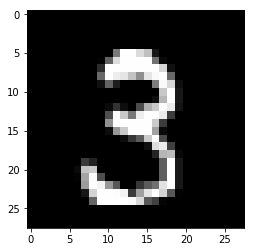

In [93]:
n_img = 21
#Just printing a random image in the mnist dataset
plt.imshow(X_train[n_img].reshape((28, 28)), cmap='gray')
plt.show()

In [94]:
# Build the model sequential 

model = Sequential()

#adding the first convolution layer with 32 kernels and kernel size 3*3.Since it is rgb we have 1 feature map in the
#input image. this will output an image with 26,26,32 32 feature maps for each kernel even if the image was rgb
#we would have still got 32 feature maps as each kernel would have calculated a feature map for each of the three and 
#taken it's average. relu seems to be a nice activation in this case though sigmoid would also work.Parameter involved
#would be 32*9(weights inside each kernel) + 32(bias of each kernel) .

model.add(Convolution2D(32, (3, 3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))

#Second layer with 16 kernels and each kernel 3*3 it gives us 24,24,16 i.e. 16 feature maps. The number of parameters 
#are 16*9*32(wieghts inside kernel) + 16(bias of each kernel)

model.add(Convolution2D(16, (3, 3)))
model.add(Activation('relu'))

#We add a layer of maxpool in this the kernel(size = 2,2) fits over 2*2 block of image and takes the max value from the
#4 cells thus the image is of size = 24/2,24/2,16 = 12,12,16

model.add(MaxPool2D(pool_size=(2, 2)))

#Third layer of convolution with 8 kernels of size 3*3 this results in an image of size 10,10,8 with 8 feature maps 
#and 8*16*9(weights inside kernel)+8(bias) = 1160 parameters

model.add(Convolution2D(8, (3, 3)))
model.add(Activation('relu'))

#Second maxpool layer again of size 2*2 thus resulting image is of size = 10/2,10/2,8 = 5,5,8

model.add(MaxPool2D(pool_size=(2, 2)))

#flatten the image to 5*5*8 = 200 (200,1) so that final pred could be done as final layer is dense it needs a vector 
#while convolutions needed a matrix

model.add(Flatten())

#To prevent overfitting drop out is added.

model.add(Dropout(0.4))

#final layer for prediction it is using softmax to calculate probability for the 10 classes. 

model.add(Dense(5))
model.add(Activation('softmax'))

#We use categorical_crossentropy as loss function and adam as the optimizer . 

model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_24 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 24, 24, 16)        4624      
_________________________________________________________________
activation_25 (Activation)   (None, 24, 24, 16)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 10, 10, 8)         1160      
_________________________________________________________________
activation_26 (Activation)   (None, 10, 10, 8)         0         
__________

In [95]:
#training takes over 8 minutes on my cpu based mac having gpu would make the whole time faster . train it for da
hist = model.fit(X_train, y_train,
                epochs=4,
                shuffle=True,
                batch_size=100,
                validation_data=(X_test, y_test))

Train on 17132 samples, validate on 4284 samples
Epoch 1/4
17132/17132 [==============================] - 25s - loss: 0.5177 - acc: 0.8094 - val_loss: 0.0839 - val_acc: 0.9725
Epoch 2/4
17132/17132 [==============================] - 25s - loss: 0.1213 - acc: 0.9632 - val_loss: 0.0524 - val_acc: 0.9853
Epoch 3/4
17132/17132 [==============================] - 25s - loss: 0.0850 - acc: 0.9741 - val_loss: 0.0399 - val_acc: 0.9883
Epoch 4/4
17132/17132 [==============================] - 25s - loss: 0.0702 - acc: 0.9769 - val_loss: 0.0358 - val_acc: 0.9904


In [96]:
model.layers[:-3]

In [97]:
#took the convolutional layers and turned their training of and added new dense(output) layer for da2
trans_model = Sequential(model.layers[:-3])
for ix in trans_model.layers :
    ix.trainable = False
trans_model.add(Dense(5))
trans_model.add(Activation('softmax'))
trans_model.summary()

trans_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_24 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 24, 24, 16)        4624      
_________________________________________________________________
activation_25 (Activation)   (None, 24, 24, 16)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 10, 10, 8)         1160      
_________________________________________________________________
activation_26 (Activation)   (None, 10, 10, 8)         0         
__________

In [98]:
#training takes over 8 minutes on my cpu based mac having gpu would make the whole time faster .run it for da2
hist = trans_model.fit(X2_train, y2_train,
                epochs=4,
                shuffle=True,
                batch_size=100,
                validation_data=(X2_test, y2_test))

Train on 16467 samples, validate on 4117 samples
Epoch 1/4
16467/16467 [==============================] - 9s - loss: 0.5949 - acc: 0.8026 - val_loss: 0.2266 - val_acc: 0.9439
Epoch 2/4
16467/16467 [==============================] - 9s - loss: 0.1802 - acc: 0.9523 - val_loss: 0.1432 - val_acc: 0.9658
Epoch 3/4
16467/16467 [==============================] - 11s - loss: 0.1295 - acc: 0.9648 - val_loss: 0.1132 - val_acc: 0.9728
Epoch 4/4
16467/16467 [==============================] - 9s - loss: 0.1065 - acc: 0.9701 - val_loss: 0.0940 - val_acc: 0.9755
